<center>
<b><span style="font-size: 40px;">GloBox - Mobile Website Analysis - Executive Summary</span></b>
</center

<b><span style="font-size: 20px;">General Information</span></b>

GloBox is an online marketplace which focus on sourving high quiality products. From exotic spices and teas to jewelry and textiles. The food and drink offerings have had a great run in the last months. Therefore, the company wants to bring more attention to this section of their business. Reason why, it was decided to run an A/B test on a new web design for the official website available for smartphones. This new design consist in to add a banner on the top of the website, where the food and drinks offerings are highlithed. 

A/B Test workflow:
1. There were set up two groups. Control and Treatment group. Users were assigned randonmly at the moment the signed up.
2. The test was run in a span of 13 days. From Jan 25th 2023 to Feb 6th 2023.
3. Data was collected in the following relational database

<center>

| users                              | groups                                      | activity                       |
| ---------------------------------- | ------------------------------------------- | ------------------------------ |
| id (user ID)                       | uid (user ID)                               | uid (user ID)                  |
| country (country code)             | group (user's test group)                   | dt (date of purchase activity) |
| gender (M=Male, F=Female, O=Other) | join_dt (date user visited website or join) | device (I=iOS, A=Android)      |
|                                    | device (I=iOS, A=Android)                   | spent (purchase amount USD)    |

</center>

<b><span style="font-size: 20px;">Results & visualizations</span></b>

The A/B test was ran in 9 different countries collecting information of approximately 50000 users. Where, USA, Brazil and Mexico provided around the 60% of the total data collected. It is worth to mention that the proportion of male and female participating in the test could be considered equal.

<p align="center">
  <img src="https://i.ibb.co/h98VSvM/country.jpg" width="600" alt="Alt Text"> <img src="https://i.ibb.co/qdHS4KP/gender.jpg" width="600" alt="Alt Text">
</p>


It was ran metrics over the data obtained from the A/B test, including conversion rate, user engagement and revenue analysis. <b>The introduction of the banner on the website has had a positive impact, suggesting that users are now more inclined to take the desired actions</b>. Besides, it is observed that the daily conversion rates for the treatment group is always higher than the overall ones (Thus higher than Control group rates) and most of time during the test it kept a tendency upwards. It was obtained conversion peaks in the middle and the end of the test. It would be interesting to analyze in depth this period in time to determine which conditions maximize conversion rates in the website

<center>

| Metric           | Control Group | Treatment Group |
| ---------------- | ------------- | --------------- |
| Conversion Rate  | 4.17%         | 4.96%           |
| User Engagement  | 1.062         | 1.07            |
| Total Revenue    | 82146 USD     | 83415 USD       |
| Revenue per user | 86.02         | 73.24           |

</center>

<p align="center">
  <img src="https://i.ibb.co/JCj9hZK/daly-conversion-rate.jpg" width="1000" alt="Alt Text">
</p>

It was observed a similar to the conversion rate for the user engagement, there is an uptick in it with the new website design. Indicating that customers are more likely to interact and take additional actions on the website due to the redesign.

Generally speaking, the new design has led to an increase in the company's revenue over the test period, approximately $1,000. However, when this boost in revenue is compared to the total number of users in each group, it becomes apparent that the individual spending of users on the new website is lower than that in the control group. <b>The new design is successfully prompting users to take more actions on the website (making purchases). However, it hasn't been able to maintain the same level of spending per user as the previous design. This could imply that while the redesign is effective at increasing user interaction, there may be additional strategies needed to retain or increase individual user spending to fully maximize the revenue potential</b>.

It was carried out a statistical analysis to determine the statistical relevance of the obtained data in terms of conversion rates. Where, the following hypothesis were set.

<b>Null Hypothesis (Ho):</b>  There is no significant difference between the control group (no banner) and the test group (banner) in terms of the metrics (conversion rate).

<b>Alternative Hypothesis (Ha):</b>  There is a significant difference between the control group and the test group in terms of the metrics.

The analysis yielded a low <b>p-value of 1.14e-25</b>, significantly below the chosen significance level of 0.05. Therefore, <b>the null hypothesis (Ho) was rejected</b>.  it can be stated that the data did not occur due to randonm behavious. Therefore, and it is save to say that <b> The introduction of the banner in the GloBox website has had a noteworthy impact on the metrics, notably on the conversion rate</b>.

<center>
<b><span style="font-size: 40px;">GloBox - Mobile Website Analysis</span></b>
</center>

In this jupyter notebook it will be analyzed the effectiveness of the new website designed by the e-commerce company GloBox. Its food and drink offerings have grown, therefore, it has been decided to increase the promotion of these products in the website of the company. For this reason, an A/B test was ran to evaluate the new design.

The detailes of the A/B test are as follow

        1. Key products in food and drink were added as banner at the top of the website.

        2. There are two groups. "Control" group which will not see any change in the website and "Treatment" group which will be directed to the new design (Banner).
        
        3. User visiting the company website is randomly assigned to one of these groups.
        
        4. Then user may or may not purchase products. If the user make a purchase (either the same day or other day) this will be considered as a "conversion".

<b><span style="font-size: 25px;">STAGE 1:</span></b> <span style="font-size: 20px;">Connecting to the ElephantSQL server and extracting data</span>

In [1]:
# Importing libraries #

import psycopg2 # Library for connecting Python to PostgreSQL
import pandas as pd # Library to analyze data

In [2]:
# THIS CELL is for connecting python to the Database in a cloud-based option of ElephantSQL

# Connection details - This can be found in the section details of the account in ElephantSQL
host = 'bubble.db.elephantsql.com'
port = 5432 # This is by default
database = 'oujerfee'
user = 'oujerfee'
password = 'Qt7gIn8u3L4VNbhLdMmNiCSw0o8CtzuQ'

# Connect to the database
conn = psycopg2.connect(host=host, port=port, database=database, user=user, password=password)

# Create a cursor object to interact with the database
cursor = conn.cursor()

In [3]:
def fetch_data(table_name):
    '''

    Definition: Function to retrive data from a public server of ElephantSQL
    Arguments: table_name The name of the table on the server
    
    '''

    # Fetching the data from the table
    cursor.execute(f"SELECT * FROM {table_name}")
    data = cursor.fetchall()

    # Getting the column names from the cursor description
    column_names = [desc[0] for desc in cursor.description]

    # Creating a DataFrame from the fetched data and column names
    df = pd.DataFrame(data, columns=column_names)

    return df

# Creating the data frames for each table in order to evaluate the data integrity
activity_df = fetch_data("activity")
groups_df = fetch_data("groups")
users_df = fetch_data("users")

conn.close()


<b><span style="font-size: 25px;">STAGE 2:</span></b> <span style="font-size: 20px;">Preliminary view and data transforming (if needed it)</span>

As first step of this analysis, the dataset will be inspected to find any anomaly of the data and transforming in the case is needed

<span style="font-size: 25px;">1. Users Table</span>

<span style="font-size: 18px;">Remarks</span>

1.  Table shape: 48943 rows x 3 columns

2.  Table Names: id (key), country and gender

3.  According to the table, the A/B test was ran in 9 different countries. USA, Brazil and Mexico provide around the 60% of the total data collected.
    There are Null values present in the set. However, they do not interfer with the study. They just represent 1.3% of the total data.
    
4.  Referring to the gender column. There are 3 options (Male, Female and Other). Male and Female provide almost the same amount of data to the set. Around 41%.
    There are Null values present in the column, around 14% that somehow could difficult the analysis in terms of gender. However, this just can be evaluated when the analysis will be performed in further steps.

In [4]:
display(users_df.dtypes)
display(users_df.head())
display(users_df.info)

id          int64
country    object
gender     object
dtype: object

,id,country,gender
0,1000000,CAN,M
1,1000001,BRA,M
2,1000002,FRA,M
3,1000003,BRA,M
4,1000004,DEU,F


<bound method DataFrame.info of             id country gender
0      1000000     CAN      M
1      1000001     BRA      M
2      1000002     FRA      M
3      1000003     BRA      M
4      1000004     DEU      F
...        ...     ...    ...
48938  1049995     BRA      F
48939  1049996     USA      F
48940  1049997     BRA      M
48941  1049998     CAN      M
48942  1049999     GBR      M

[48943 rows x 3 columns]>

In [5]:
import pandas as pd

In [6]:
def generate_counts_summary(dataframe, column_name, count_label, null_label='Null'):
    '''

    Definition: Quick function that calculates distinct values and null values.
                Then gives the value for each distinct value and its percentage

    Arguments:  dataframe = Dataframe which is going to be analyzed
                column name = Name of the Specific colum where the analysis will be done
                count_label = Name whcih is going to be assigned to the count column
                null_label = New row for the null values count. Default name is "Null"

    '''
    
    # 'Counts Summary'
    counts = dataframe[column_name].value_counts()
    
    # Add the null count row
    counts[null_label] = dataframe[column_name].isnull().sum()
    
    # Convert to DataFrame
    counts_df = counts.reset_index()
    counts_df.columns = [column_name, count_label]
        
    # Calculate percentages
    total_count = counts_df[count_label].sum()
    counts_df['Percentage'] = (counts_df[count_label] / total_count) * 100.0
    
    # Calculate the total
    total_row = pd.DataFrame({column_name: ['Total'], count_label: [total_count], 'Percentage': [100.0]})
    
    # Concatenate the 'Total' row to the DataFrame
    counts_df = pd.concat([counts_df, total_row], ignore_index=True)
    
    return counts_df  # Return the generated counts DataFrame

In [7]:
display(generate_counts_summary(users_df, 'country', 'User Count', null_label='Null'))

,country,User Count,Percentage
0,USA,14772,30.182049
1,BRA,9434,19.275484
2,MEX,5738,11.723842
3,DEU,3854,7.874466
4,TUR,3732,7.625197
5,FRA,3090,6.313467
6,GBR,2949,6.025376
7,ESP,1993,4.072084
8,CAN,1570,3.207813
9,AUS,1168,2.386450


In [8]:
display(generate_counts_summary(users_df, 'gender', 'User Count', null_label='Null'))

,gender,User Count,Percentage
0,M,20289,41.454345
1,F,20130,41.129477
2,O,1669,3.410089
3,Null,6855,14.006089
4,Total,48943,100.000000


<span style="font-size: 25px;">2. Groups Table</span>

<span style="font-size: 18px;">Remarks</span>

1.  Table shape: 48943 rows x 4 columns

2.  Table Names: uid (key), group, join_dt and device 

3.  The only column having Null values is 'device'. However, just represent the 0.6% of the whole set. Therefore, it will not be a issue for the analysis
    
4.  The group column provides the information about where the user was assignated. Either control (A) or treatment (B) group.

5.  It is found that the recollection of the data took 12 days. From January 25th 2023 to February 6th 2023.

6.  Device column provides information about the kind of mobile was used to sign up. Either Android or iOS

In [9]:
display(groups_df.dtypes)
display(groups_df.head())
display(groups_df.info)

uid                 int64
group              object
join_dt    datetime64[ns]
device             object
dtype: object

,uid,group,join_dt,device
0,1000000,B,2023-01-28,I
1,1000001,A,2023-01-27,A
2,1000002,A,2023-02-01,A
3,1000003,B,2023-01-25,I
4,1000004,A,2023-02-04,A


<bound method DataFrame.info of            uid group    join_dt device
0      1000000     B 2023-01-28      I
1      1000001     A 2023-01-27      A
2      1000002     A 2023-02-01      A
3      1000003     B 2023-01-25      I
4      1000004     A 2023-02-04      A
...        ...   ...        ...    ...
48938  1049995     B 2023-02-03      A
48939  1049996     A 2023-01-29      A
48940  1049997     B 2023-02-03      A
48941  1049998     B 2023-02-03      I
48942  1049999     B 2023-01-29      I

[48943 rows x 4 columns]>

In [10]:
display(generate_counts_summary(groups_df, 'group', 'User Count', null_label='Null'))

,group,User Count,Percentage
0,B,24600,50.26255
1,A,24343,49.73745
2,Null,0,0.00000
3,Total,48943,100.00000


In [11]:
display(generate_counts_summary(groups_df, 'join_dt', 'User Count', null_label='Null'))

,join_dt,User Count,Percentage
0,2023-01-25 00:00:00,11646,23.795027
1,2023-01-26 00:00:00,8270,16.897207
2,2023-01-27 00:00:00,6043,12.347016
3,2023-01-28 00:00:00,4543,9.282226
4,2023-01-29 00:00:00,3567,7.288070
5,2023-01-30 00:00:00,2894,5.913001
6,2023-01-31 00:00:00,2392,4.887318
7,2023-02-01 00:00:00,2057,4.202848
8,2023-02-02 00:00:00,1803,3.683877
9,2023-02-03 00:00:00,1650,3.371269


In [12]:
display(generate_counts_summary(groups_df, 'device', 'User Count', null_label='Null'))

,device,User Count,Percentage
0,A,30289,61.886276
1,I,18360,37.513025
2,Null,294,0.600699
3,Total,48943,100.000000


<span style="font-size: 25px;">3. Activity Table</span>

In [13]:
display(activity_df.dtypes)
display(activity_df.head())
display(activity_df.info)

uid                int64
dt        datetime64[ns]
device            object
spent             object
dtype: object

,uid,dt,device,spent
0,1000039,2023-02-04,A,36.65
1,1000045,2023-01-30,I,51.58
2,1000071,2023-02-02,I,6.71
3,1000101,2023-02-02,A,18.13
4,1000101,2023-02-05,A,5.674496940652932


<bound method DataFrame.info of           uid         dt device              spent
0     1000039 2023-02-04      A              36.65
1     1000045 2023-01-30      I              51.58
2     1000071 2023-02-02      I               6.71
3     1000101 2023-02-02      A              18.13
4     1000101 2023-02-05      A  5.674496940652932
...       ...        ...    ...                ...
2228  1049880 2023-01-26      I             186.69
2229  1049891 2023-01-26      A              47.14
2230  1049894 2023-01-25      I              34.05
2231  1049927 2023-01-25      A              52.03
2232  1049973 2023-01-31      A              85.93

[2233 rows x 4 columns]>

In [14]:
display(generate_counts_summary(activity_df, 'dt', 'User Count', null_label='Null'))

,dt,User Count,Percentage
0,2023-01-25 00:00:00,385,17.241379
1,2023-01-26 00:00:00,315,14.106583
2,2023-01-27 00:00:00,263,11.777877
3,2023-01-28 00:00:00,213,9.538737
4,2023-01-29 00:00:00,167,7.478728
5,2023-01-30 00:00:00,162,7.254814
6,2023-01-31 00:00:00,158,7.075683
7,2023-02-01 00:00:00,119,5.329154
8,2023-02-06 00:00:00,97,4.343932
9,2023-02-03 00:00:00,95,4.254366


In [15]:
display(generate_counts_summary(activity_df, 'device', 'User Count', null_label='Null'))

,device,User Count,Percentage
0,I,1203,53.873712
1,A,1020,45.678459
2,Null,10,0.447828
3,Total,2233,100.000000


<span style="font-size: 18px;">Remarks</span>

1.  Table shape: 2233 rows x 4 columns. Already, it has a glimpse about the conversion rate.

2.  Table Names: uid (key), dt, device and spent

3.  The only column having Null values is 'device'. However, just represent the 0.4% of the whole set. Therefore, it will not be a issue for the analysis

<b><span style="font-size: 25px;">STAGE 3:</span></b> <span style="font-size: 20px;">Data Segmentation and Metrics calculation</span>

In order to evaluate the effectiveness of the new design of GloBox website. It was ran some metrics over the data obtained from the A/B test, including conversion rate, user engagement and revenue analysis. The following table summarizes the data obtained for the aforementioned metrics.

| Metric | Control Group | Treatment Group |
| -------- | -------- | -------- |
| Conversion Rate | 4.17% | 4.96% |
| User Engagement | 1.062 | 1.07 |
| Total Revenue | 82146 USD | 83415 USD |
| Revenue per user | 86.02 | 73.24 |

<span style="font-size: 26px;">Remarks</span>

Conversion Rate: The introduction of the banner on the website has had a notably positive impact, resulting in an impressive increase of approximately 19% in the conversion rate. This suggests that users are now more inclined to take the desired actions

User Engagement: Similar to the behavior observed in the conversion rate, there is an uptick in user engagement with the new website design. This indicates that customers are more likely to interact and take additional actions on the website due to the redesign.

Revenue: This metric shows an interestirng behaviour. Overall, the new design has led to a significant increase in the company's revenue over the 12-day test period, amounting to approximately $1,000. However, when this boost in revenue is compared to the total number of users in each group, it becomes apparent that the individual spending of users on the new website is lower than that in the control group. In essence, the new design is successfully prompting users to take more actions on the website, particularly making purchases. However, it hasn't been able to maintain the same level of spending per user as the previous design. This could imply that while the redesign is effective at increasing user interaction, there may be additional strategies needed to retain or increase individual user spending to fully maximize the revenue potential.

<b><span style="font-size: 18px;">3.1</span></b> <span style="font-size: 18px;">Conversion Rate</span>

<span style="font-size: 18px;">Control Group</span>

In [16]:
# Connect to the database
conn = psycopg2.connect(host=host, port=port, database=database, user=user, password=password)
cursor = conn.cursor()

# Query control group - Conversion rate
group_a = ("SELECT (SELECT COUNT(uid) FROM groups WHERE \"group\" = 'A'), COUNT(a.uid),  "
           "ROUND(COUNT(a.uid)::numeric / (SELECT COUNT(uid) FROM groups WHERE \"group\" = 'A'),4) "
            "FROM groups g "
            "JOIN activity a ON g.uid = a.uid "
            "WHERE a.spent > 0 AND g.group = 'A' " )

def execute_query(query, column_names=None):
    '''

    Definition: It allows to extract the data from the SQL server and conver it into a df
    Arguments:  query = SQL query you want to run
                column_names = Names of the columns. If you want to specify them use ['']
                Otherwise leave it as None, will get the default values

    '''
    cursor.execute(query)
    data = cursor.fetchall()
    
    if column_names:
        df = pd.DataFrame(data, columns=column_names)
    else:
        columns = [desc[0] for desc in cursor.description]
        df = pd.DataFrame(data, columns=columns)
    
    return df

columns=['Total Control Group', 'Total purchases - Control Group', 'Conversion Rate - Control Group']
group_a_result = execute_query(group_a, column_names=columns)
display(group_a_result)

,Total Control Group,Total purchases - Control Group,Conversion Rate - Control Group
0,24343,1014,0.0417


<b><span style="font-size: 18px;">3.1</span></b> <span style="font-size: 18px;">Conversion Rate</span>

<span style="font-size: 18px;">Treatment Group</span>

In [17]:
# Query treatment group - Conversion rate
group_b = ("SELECT (SELECT COUNT(uid) FROM groups WHERE \"group\" = 'B'), COUNT(a.uid),  "
           "ROUND(COUNT(a.uid)::numeric / (SELECT COUNT(uid) FROM groups WHERE \"group\" = 'B'),4) "
            "FROM groups g "
            "JOIN activity a ON g.uid = a.uid "
            "WHERE a.spent > 0 AND g.group = 'B' " )

columns=['Total Treatment Group', 'Total purchases - Treatment Group', 'Conversion Rate - Treatment Group']
group_b_result = execute_query(group_b, column_names=columns)
display(group_b_result)

,Total Treatment Group,Total purchases - Treatment Group,Conversion Rate - Treatment Group
0,24600,1219,0.0496


<b><span style="font-size: 18px;">3.2</span></b> <span style="font-size: 18px;">User Engagement</span>

<span style="font-size: 18px;">Control Group</span>

In [18]:
# Query control group - User Engagement
group_a_ue1 = ("WITH t1 AS "
            "(SELECT g.uid, COUNT(a.uid) AS count "
            "FROM groups g "
            "JOIN activity a ON g.uid = a.uid "
            "WHERE a.spent > 0 AND g.group = 'A' "
            "GROUP BY g.uid "
            "ORDER BY 2 DESC )"
            "SELECT AVG(count) FROM t1 ")

columns=['User Engagement - Control Group']
group_a_ue1_result = execute_query(group_a_ue1, column_names=columns)
display(group_a_ue1_result)

,User Engagement - Control Group
0,1.0617801047120419


<b><span style="font-size: 18px;">3.2</span></b> <span style="font-size: 18px;">User Engagement</span>

<span style="font-size: 18px;">Treatment Group</span>

In [19]:
# Query Treatment group - User Engagement
group_b_ue1 = ("WITH t2 AS "
            "(SELECT g.uid, COUNT(a.uid) AS count "
            "FROM groups g "
            "JOIN activity a ON g.uid = a.uid "
            "WHERE a.spent > 0 AND g.group = 'B' "
            "GROUP BY g.uid "
            "ORDER BY 2 DESC )"
            "SELECT AVG(count) FROM t2 ")

columns=['User Engagement - Treatment Group']
group_b_ue1_result = execute_query(group_b_ue1, column_names=columns)
display(group_b_ue1_result)

,User Engagement - Treatment Group
0,1.0702370500438982


<b><span style="font-size: 18px;">3.3</span></b> <span style="font-size: 18px;">Revenue</span>

<span style="font-size: 18px;">Control Group</span>

In [20]:
# Query control group - Revenue per user
group_a_ru = ("SELECT SUM(a.spent), SUM(a.spent)/(SELECT COUNT(DISTINCT a.uid) FROM activity a "
              "JOIN groups g ON a.uid = g.uid WHERE a.spent > 0 AND g.group = 'A') "
              "FROM groups g "
              "JOIN activity a ON g.uid = a.uid "
              "WHERE a.spent > 0 AND g.group = 'A' ")

columns=['Total Revenue', 'Revenue per user']
group_a_ru_result = execute_query(group_a_ru, column_names=columns)
display(group_a_ru_result)

,Total Revenue,Revenue per user
0,82145.9030647917812902,86.0166524238657396


<b><span style="font-size: 18px;">3.3</span></b> <span style="font-size: 18px;">Revenue</span>

<span style="font-size: 18px;">Treatment Group</span>

In [21]:
# Query treatmentment group - Revenue per user
group_b_ru = ("SELECT SUM(a.spent), SUM(a.spent)/(SELECT COUNT(DISTINCT a.uid) FROM activity a "
              "JOIN groups g ON a.uid = g.uid WHERE a.spent > 0 AND g.group = 'B') "
              "FROM groups g "
              "JOIN activity a ON g.uid = a.uid "
              "WHERE a.spent > 0 AND g.group = 'B' ")

columns=['Total Revenue', 'Revenue per user']
group_b_ru_result = execute_query(group_b_ru, column_names=columns)
display(group_b_ru_result)

,Total Revenue,Revenue per user
0,83415.32686879026823277,73.23558109639180705


<b><span style="font-size: 25px;">STAGE 4:</span></b> <span style="font-size: 20px;">Statistical Analysis</span>

<b><span style="font-size: 20px;">STAGE 4.1:</span></b> <span style="font-size: 20px;">Hypothesis Testing</span>

It was defined the Null Hypothesis (Ho) and Alternative Hypothesis (Ha) based on the conversion rate, to evaluate further the new design:

<b>Null Hypothesis (Ho):</b>  There is no significant difference between the control group (no banner) and the test group (banner) in terms of the metrics (conversion rate).

<b>Alternative Hypothesis (Ha):</b>  There is a significant difference between the control group and the test group in terms of the metrics.

Also, it was chosen the <b>Significance Level (Alpha)</b> at 0.05 (5%).

<b><span style="font-size: 20px;">STAGE 4.2:</span></b> <span style="font-size: 20px;">Statistical Test</span>

Since, proportions (conversion rate) will be compared. It was decided to use <b>Chi-Squared Test</b> to confirm independance among the variables. 


<span style="font-size: 26px;">Remarks</span>

The analysis yielded an extremely low <b>p-value of 1.14e-25</b>, significantly below the chosen significance level of 0.05. 

Consequently, <b>the null hypothesis (Ho) was rejected</b>, which posited that there is no significant difference between the control group (no banner) and the treatment group (banner) in terms of the metrics, specifically the conversion rate. 

This outcome indicates a clear and substantial <b>divergence between the two groups</b>, and this divergence can be <b>attributed to the presence of the food and drinks banner on the GloBox website. The introduction of the banner has had a noteworthy impact on the metrics, notably on the conversion rate</b>.

<b>Contingency Table</b> expected values

In [22]:
CT_list = [
    [round(group_a_result.loc[0, 'Conversion Rate - Control Group'] * group_a_result.loc[0, 'Total Control Group']), round((1 - group_a_result.loc[0, 'Conversion Rate - Control Group']) * group_a_result.loc[0, 'Total Control Group'])],
    [round(group_b_result.loc[0, 'Conversion Rate - Treatment Group'] * group_b_result.loc[0, 'Total Treatment Group']), round((1 - group_b_result.loc[0, 'Conversion Rate - Treatment Group']) * group_b_result.loc[0, 'Total Treatment Group'])]
]

CT_df_expected = pd.DataFrame(CT_list, columns=['Expected Conversion', 'Expected No Conversions'])
CT_df_expected['Group'] = ['Control Group', 'Treatment Group']
CT_df_expected['Chi-Squared Statistics'] = ['Control Group', 'Treatment Group']

CT_df_expected = CT_df_expected[['Group', 'Expected Conversion', 'Expected No Conversions']]
display(CT_df_expected)

,Group,Expected Conversion,Expected No Conversions
0,Control Group,1015,23328
1,Treatment Group,1220,23380


<b>Contingency Table</b> observed values

In [23]:
CT_list_o = [
    [group_a_result.loc[0, 'Total purchases - Control Group'],  round(group_a_result.loc[0, 'Total Control Group'] - group_a_result.loc[0, 'Conversion Rate - Control Group'])],
    [group_b_result.loc[0, 'Total purchases - Treatment Group'],  round(group_b_result.loc[0, 'Total Treatment Group'] - group_b_result.loc[0, 'Conversion Rate - Treatment Group'])]
]

CT_df_observed = pd.DataFrame(CT_list_o, columns=['Observed Conversion', 'Observed No Conversions'])
CT_df_observed['Group'] = ['Control Group', 'Treatment Group']
CT_df_observed = CT_df_observed[['Group', 'Observed Conversion', 'Observed No Conversions']]
display(CT_df_observed)

,Group,Observed Conversion,Observed No Conversions
0,Control Group,1014,24343
1,Treatment Group,1219,24600


<b>Chi-Squared Statistics</b>

In [24]:
chi_stats = [
    [(CT_df_observed.loc[0,'Observed Conversion'] - CT_df_expected.loc[0,'Expected Conversion'])**2 / CT_df_expected.loc[0,'Expected Conversion'] , (CT_df_observed.loc[0,'Observed No Conversions'] - CT_df_expected.loc[0,'Expected No Conversions'])**2 / CT_df_expected.loc[0,'Expected No Conversions'] ],
    [(CT_df_observed.loc[1,'Observed Conversion'] - CT_df_expected.loc[1,'Expected Conversion'])**2 / CT_df_expected.loc[1,'Expected Conversion'] , (CT_df_observed.loc[1,'Observed No Conversions'] - CT_df_expected.loc[1,'Expected No Conversions'])**2 / CT_df_expected.loc[1,'Expected No Conversions'] ]
]

chi_stat_df = pd.DataFrame(chi_stats, columns=['Conversion', 'No Conversions'])
chi_stat_df['Group'] = ['Control Group', 'Treatment Group']
chi_stat_df = chi_stat_df[['Group', 'Conversion', 'No Conversions']]
display(chi_stat_df)

sum_conversion = chi_stat_df["Conversion"].sum()
sum_no_conversions = chi_stat_df["No Conversions"].sum()

total_chi_value = sum_conversion + sum_no_conversions
print('Final Chi-Squared value:', total_chi_value)


,Group,Conversion,No Conversions
0,Control Group,0.000985,44.162594
1,Treatment Group,0.000820,63.661249


Final Chi-Squared value: 107.82564813178627


<b><span style="font-size: 25px;">STAGE 5:</span></b> <span style="font-size: 20px;">Data Visualization</span>

<span style="font-size: 20px;">Data User Demographics</span>

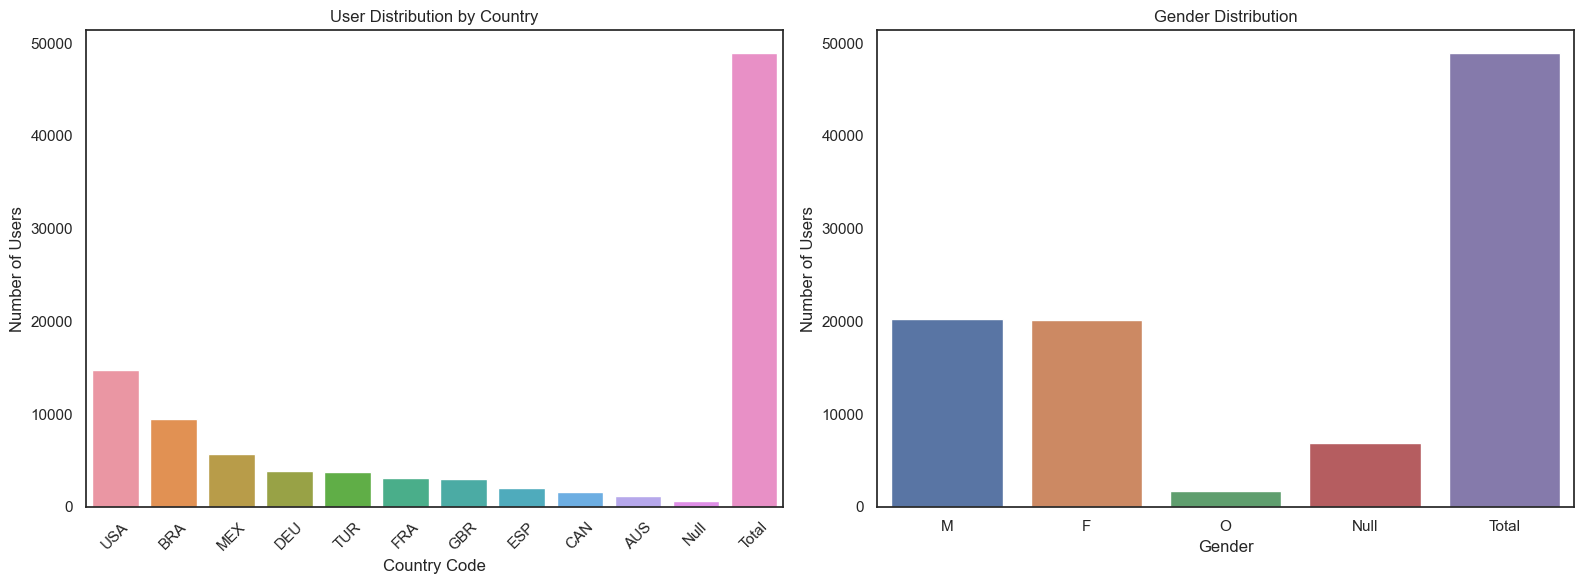

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

country_counts = generate_counts_summary(users_df, 'country', 'User Count', null_label='Null')
gender_counts = generate_counts_summary(users_df, 'gender', 'User Count', null_label='Null')

def generate_and_display_barplots(dataframes, x_cols, y_cols, titles, x_labels, y_labels, rotations):
    '''
    Definition: Function that allows to generate bar plot from different dataframes 
    Arguments:  dataframes = Dataframes sources. Format [df1, df2,...]
                x_cols = Independant variable. Columns names. Fomat ['col1', 'col2', ....]
                y_cols = Dependant variable. Columns names. Fomat ['col1', 'col2', ....]
                titles = Titles for each plot. Format ['title1', 'title2', ....]
                x_labels = Label x axis. Format ['axis1', 'axis2', ....]
                y_labels = Label y axis. Format ['yxis1', 'yxis2', ....]
                rotations = Rotate axis labels in case is needed. Format [45, 45, ....]     
    '''
    
    sns.set(style='white')
    num_plots = len(dataframes)
    
    # Determine the number of rows and columns based on the number of plots
    num_rows = num_plots // 2
    num_cols = 2 if num_plots > 1 else 1

    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 6 * num_rows))

    # Flatten the axes if there's only one row or one column
    if num_plots > 1:
        axes = axes.flatten()

    for i in range(num_plots):
        ax = axes[i]
        dataframe = dataframes[i]
        x_col = x_cols[i]
        y_col = y_cols[i]
        title = titles[i]
        x_label = x_labels[i]
        y_label = y_labels[i]
        rotation = rotations[i]
        
        ax = sns.barplot(x=x_col, y=y_col, data=dataframe, ax=ax)
        ax.set_title(title)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)

    plt.tight_layout()
    

dataframes = [country_counts, gender_counts]
x_cols = ['country', 'gender']
y_cols = ['User Count', 'User Count']
titles = ['User Distribution by Country', 'Gender Distribution']
x_labels = ['Country Code', 'Gender']
y_labels = ['Number of Users', 'Number of Users']
rotations = [45, 0]

generate_and_display_barplots(dataframes, x_cols, y_cols, titles, x_labels, y_labels, rotations)

plt.savefig("your_image.jpg", dpi=300, bbox_inches='tight')

plt.show()

<span style="font-size: 20px;">Groups Distribution and Activity behaviour</span>

In [26]:
# Groups distribution and first sign up
group_counts = generate_counts_summary(groups_df, 'group', 'User Count', null_label='Null')
daily_join_counts = generate_counts_summary(groups_df, 'join_dt', 'User Count', null_label='Null')
phone_type_counts = generate_counts_summary(groups_df, 'device', 'User Count', null_label='Null')

# Activity behaviour
daily_purchase_counts = generate_counts_summary(activity_df, 'dt', 'User Count', null_label='Null')
device_purchase_counts =generate_counts_summary(activity_df, 'device', 'User Count', null_label='Null')

In [27]:
# Daily behaviours

# Count of users joined per day
total_user_join = groups_df.groupby(['join_dt']).size().reset_index(name='User Joins')

# Count of users who made a purchase per day
group_activity_merged = groups_df.merge(activity_df, on='uid')
total_activity_users_counts = group_activity_merged.groupby(['dt']).agg({'uid': 'nunique'}).reset_index()

# Merging total user joing and activity per user to know the daily conversion rate
merged_data = total_activity_users_counts.merge(total_user_join, left_on='dt', right_on='join_dt', how='inner')
merged_data['Percentage'] = (merged_data['uid'] / merged_data['User Joins']) * 100
display(merged_data)


,dt,uid,join_dt,User Joins,Percentage
0,2023-01-25,385,2023-01-25,11646,3.305856
1,2023-01-26,315,2023-01-26,8270,3.808948
2,2023-01-27,263,2023-01-27,6043,4.352143
3,2023-01-28,213,2023-01-28,4543,4.688532
4,2023-01-29,167,2023-01-29,3567,4.681805
5,2023-01-30,162,2023-01-30,2894,5.597789
6,2023-01-31,158,2023-01-31,2392,6.605351
7,2023-02-01,119,2023-02-01,2057,5.785124
8,2023-02-02,92,2023-02-02,1803,5.102607
9,2023-02-03,95,2023-02-03,1650,5.757576


In [28]:
# Daily behaviours

# Count of users joined per day and group
user_joins = groups_df.groupby(['join_dt', 'group']).size().reset_index(name='User Joins')

# Count of users who made a purchase per day and group
activity_users_counts = group_activity_merged.groupby(['dt', 'group']).agg({'uid': 'nunique'}).reset_index()

# Merging total user joing and activity per user to know the daily conversion rate per group
merged_data1 = user_joins.merge(activity_users_counts, left_on=['join_dt', 'group'], right_on=['dt', 'group'], how='inner')
merged_data1['Percentage'] = (merged_data1['uid'] / merged_data1['User Joins']) * 100
display(merged_data1)

,join_dt,group,User Joins,dt,uid,Percentage
0,2023-01-25,A,5733,2023-01-25,169,2.947846
1,2023-01-25,B,5913,2023-01-25,216,3.652968
2,2023-01-26,A,4114,2023-01-26,141,3.427321
3,2023-01-26,B,4156,2023-01-26,174,4.186718
4,2023-01-27,A,3062,2023-01-27,131,4.278250
5,2023-01-27,B,2981,2023-01-27,132,4.428044
6,2023-01-28,A,2310,2023-01-28,102,4.415584
7,2023-01-28,B,2233,2023-01-28,111,4.970891
8,2023-01-29,A,1765,2023-01-29,80,4.532578
9,2023-01-29,B,1802,2023-01-29,87,4.827969


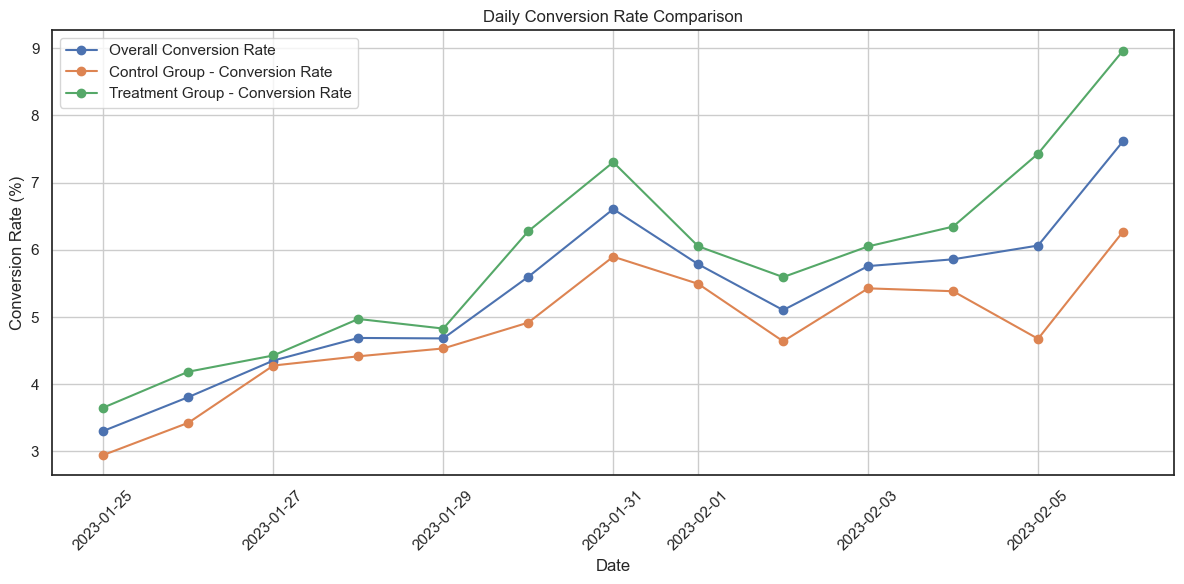

In [34]:
plt.figure(figsize=(12, 6))
ax = plt.gca()

ax.plot(merged_data['dt'], merged_data['Percentage'], label='Overall Conversion Rate', marker='o')
ax.plot(merged_data1[merged_data1['group'] == 'A']['dt'], merged_data1[merged_data1['group'] == 'A']['Percentage'], label='Control Group - Conversion Rate', marker='o')
ax.plot(merged_data1[merged_data1['group'] == 'B']['dt'], merged_data1[merged_data1['group'] == 'B']['Percentage'], label='Treatment Group - Conversion Rate', marker='o')

plt.title('Daily Conversion Rate Comparison')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (%)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()

plt.savefig("daly_conversion_rate.jpg", dpi=300, bbox_inches='tight')

plt.show()
